## Tox 21 dataset exploration



This notebook is executed on 16, Jan, 2018. 

The tox21 dataset behavior or `chainer_chemistry` library behavior might change in the future.

Loading modules and set loglevel.

In [1]:
import logging
from chainer_chemistry import datasets

# show INFO level log from chainer chemistry
logging.basicConfig(level=logging.INFO)

Tox 21 dataset consists of train/validation/test data and they can be downloaded automatically with chainer chemistry. 
The format of tox21 dataset is "sdf" file.
You may check the file path of downloaded sdf file with `get_tox21_filepath` method. 

In [3]:
train_filepath = datasets.get_tox21_filepath('train')
val_filepath = datasets.get_tox21_filepath('val')
test_filepath = datasets.get_tox21_filepath('test')

print('train_filepath = ', train_filepath)
print('val_filepath = ', val_filepath)
print('test_filepath = ', test_filepath)

Dataset contains 12 types of toxity, the label of toxity can be checked by `get_tox21_label_names` method.


In [4]:
label_names = datasets.get_tox21_label_names()
print('tox21 label_names = ', label_names)

tox21 label_names =  ['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']


### Preprocessing dataset

Dataset extraction depends on the preprocessing method, which is determined by `preprocessor`.

Here, let's look an example of using `NFPPreprocessor` preprocessor for tox21 dataset exraction.

Procedure is as follows,

1. Instantiate `preprocessor` (here `NFPPreprocessor` is used).
2. call `get_tox21` method with `preprocessor`.

Note that `retrain_smiles` option can be used to get smiles information together with the dataset itself.

In [6]:
from chainer_chemistry.dataset.preprocessors.nfp_preprocessor import \
    NFPPreprocessor

preprocessor = NFPPreprocessor()
train, val, test, train_smiles, val_smiles, test_smiles = datasets.get_tox21(preprocessor, labels=None, retain_smiles=True)

100%|██████████| 11764/11764 [00:18<00:00, 651.54it/s]
INFO:chainer_chemistry.dataset.parsers.sdf_file_parser:Preprocess finished. FAIL 0, SUCCESS 11757, TOTAL 11757
100%|██████████| 296/296 [00:00<00:00, 506.51it/s]
INFO:chainer_chemistry.dataset.parsers.sdf_file_parser:Preprocess finished. FAIL 0, SUCCESS 295, TOTAL 295
100%|██████████| 647/647 [00:01<00:00, 632.84it/s]
INFO:chainer_chemistry.dataset.parsers.sdf_file_parser:Preprocess finished. FAIL 0, SUCCESS 645, TOTAL 645


Dataset extraction depends on the `preprocessor`, and you may use other type of `preprocessor` as well.

Below is another example of using `GGNNPreprocessor` for dataset extraction.

In [21]:
from chainer_chemistry.dataset.preprocessors.ggnn_preprocessor import \
    GGNNPreprocessor

#preprocessor = GGNNPreprocessor()
#train, val, test, train_smiles, val_smiles, test_smiles = datasets.get_tox21(preprocessor, labels=None, retain_smiles=True)

### Check extracted dataset

First, let's check number of data for train/validation/test dataset.

In [10]:
print('dataset information...')
print('train', type(train), len(train))
print('val', type(val), len(val))
print('test', type(test), len(test))

print('smiles information...')
print('train_smiles', type(train_smiles), len(train_smiles))

dataset information...
train <class 'chainer_chemistry.datasets.numpy_tuple_dataset.NumpyTupleDataset'> 11757
val <class 'chainer_chemistry.datasets.numpy_tuple_dataset.NumpyTupleDataset'> 295
test <class 'chainer_chemistry.datasets.numpy_tuple_dataset.NumpyTupleDataset'> 645
smiles information...
train_smiles <class 'list'> 11757


The dataset is a class of `NumpyTupleDataset`, where i-th dataset features can be accessed by `dataset[i]`.

When `NFPPreprocessor` is used, each dataset consists of following features
 1. atom feature: representing atomic number of given molecule. 
 2. adjacency matrix feature: representing adjacency matrix of given molecule.
 3. label feature: representing toxity (label) of given molecule.
    Here, 0 indicates negative (no toxity), 1 indicates positive (toxic) and -1 indicates data is not available, respectively.

Let's look an example of 7777-th train dataset

In [59]:
index = 7777

print('index={}, SMILES={}'.format(index, train_smiles[index]))
atom, adj, labels = train[index]
# This molecule has N=17 atoms.
print('atom', atom.shape, atom)
# adjacency matrix is NxN matrix, where N is number of atoms in the molecule.
# Unlike usual adjacency matrix, diagonal elements are filled with 1, for NFP calculation purpose.
print('adj', adj.shape)
print(adj)
print('labels', labels)

index=7777, SMILES=CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21
atom (17,) [6 6 7 6 6 6 8 8 6 8 6 6 6 6 6 7 6]
adj (17, 17)
[[ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.

### Visualizing the molecule

One might want to visualize molecule given SMILES information.
Here is an example code:


In [53]:
# This script is referred from http://rdkit.blogspot.jp/2015/02/new-drawing-code.html
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
def moltosvg(mol,molSize=(450,150),kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    # It seems that the svg renderer used doesn't quite hit the spec.
    # Here are some fixes to make it work in the notebook, although I think
    # the underlying issue needs to be resolved at the generation step
    return svg.replace('svg:','')

smiles: CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21


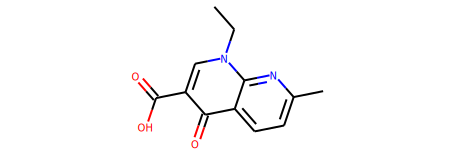

In [54]:
smiles = train_smiles[index]
mol = Chem.MolFromSmiles(train_smiles[index])

print('smiles:', smiles)
SVG(moltosvg(mol))

### Interactively watch through the tox21 dataset

Jupyter notebook provides handy module to check/visualize the data.
Here `interact` module can be used to interactively check the internal of tox 21 dataset.

index=5878, SMILES=CN(C)CCn1nnnc1SCC1=C(C(=O)O)N2C(=O)C(NC(=O)Cc3csc(N)n3)C2SC1.Cl
atom [ 6  7  6  6  6  7  7  7  7  6 16  6  6  6  6  8  8  7  6  8  6  7  6  8  6
  6  6 16  6  7  7  6 16  6 17]
labels [ 0  0  0  0  0  0  0 -1  0 -1  0  0]


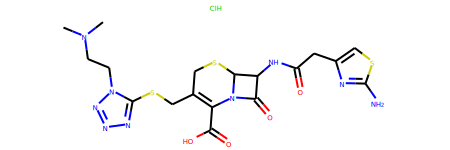

<function __main__.show_train_dataset>

In [55]:
from ipywidgets import interact

def show_train_dataset(index):
    atom, adj, labels = train[index]
    smiles = train_smiles[index]
    print('index={}, SMILES={}'.format(index, smiles))
    print('atom', atom)
    # print('adj', adj)
    print('labels', labels)
    mol = Chem.MolFromSmiles(train_smiles[index])
    return SVG(moltosvg(mol))

interact(show_train_dataset, index=(0, len(train) - 1, 1))

### Appendix: how to save the molecule figure?

`rdkit` provides `Draw.MolToFile` method to visualize `mol` instance and save it to `png` format. 

In [56]:
import os
dirpath = 'images'

if not os.path.exists(dirpath):
    os.mkdir(dirpath)

In [57]:
from rdkit.Chem import Draw
index = 7777
save_filepath = os.path.join(dirpath, 'mol_{}.png'.format(index))
print('drawing {}'.format(save_filepath))

mol = Chem.MolFromSmiles(train_smiles[index])
Draw.MolToFile(mol, save_filepath, size=(600, 600))

drawing images\mol_7777.png
